### Batch Normalization e momentum

Aproveitando o código do Leraning rate, vamos incluir o recurso momentum e avaliar o batch normalization.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregar o dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pré-processamento dos dados
x_train = x_train.astype('float32') / 256.0
x_test = x_test.astype('float32') / 256.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Transformar os rótulos em categorias (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [3]:
# Definir o modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\Carlos Carneiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:
# Definir uma função de programação da taxa de aprendizado. Escolha o valor de l_r
def lr_schedule(epoch):
    initial_lr = 0.001
    if epoch < 5:
        return initial_lr
    elif epoch < 10:
        return initial_lr * 0.5
    else:
        return initial_lr * 0.1


In [5]:
# Compilar o modelo com otimizador Adam e uma taxa de aprendizado inicial. Escolha o valor l_r
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Definir o callback de programação da taxa de aprendizado
lr_scheduler = LearningRateScheduler(lr_schedule)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8796 - loss: 0.4044 - val_accuracy: 0.9852 - val_loss: 0.0472 - learning_rate: 0.0010
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9846 - loss: 0.0520 - val_accuracy: 0.9865 - val_loss: 0.0401 - learning_rate: 0.0010
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9894 - loss: 0.0350 - val_accuracy: 0.9888 - val_loss: 0.0334 - learning_rate: 0.0010
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9916 - loss: 0.0282 - val_accuracy: 0.9884 - val_loss: 0.0379 - learning_rate: 0.0010
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9938 - loss: 0.0194 - val_accuracy: 0.9873 - val_loss: 0.0361 - learning_rate: 0.0010
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9966 - loss: 0.0120 - val_accuracy: 0.9919 - val_loss: 0.0270 - learning_rate: 5.0000e-04
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9978

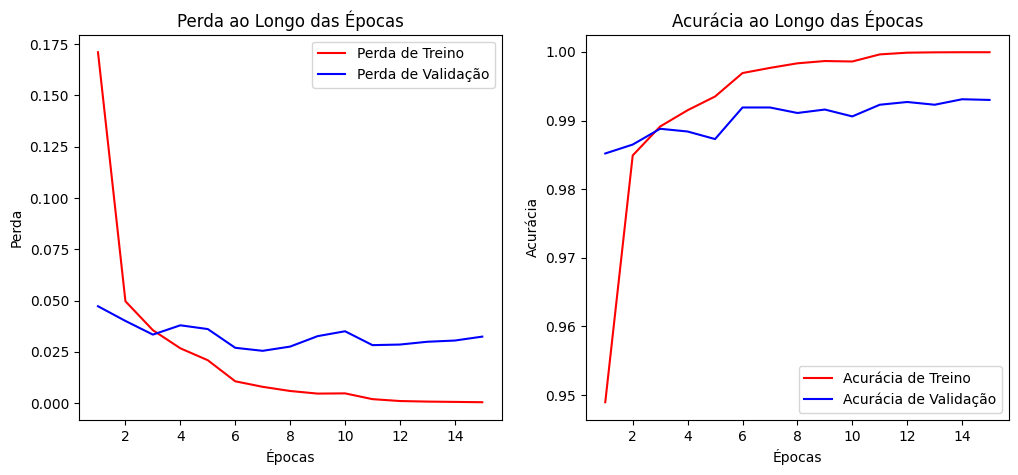

In [6]:
# Executando 15 épocas. Tamanho dos mini lotes: 64 (64 amostras por vez antes de calcular o gradiente e ajustar os pesos).
# escolher isso também para melhorar o resultado de perda e acurácia.

# Treinar o modelo
history = model.fit(x_train, y_train, epochs=15, batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler])

# Avaliar o modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plotar os gráficos de perda e acurácia
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 5))

# Gráfico de perda
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], 'r-', label='Perda de Treino')
plt.plot(epochs, history.history['val_loss'], 'b-', label='Perda de Validação')
plt.title('Perda ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Gráfico de acurácia
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], 'r-', label='Acurácia de Treino')
plt.plot(epochs, history.history['val_accuracy'], 'b-', label='Acurácia de Validação')
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

# Gráfico da taxa de aprendizado
lr_schedule_values = [lr_schedule(epoch) for epoch in range(15)]
plt.subplot(1, 3, 3)
plt.plot(range(15), lr_schedule_values, 'g-', marker='o', label='Taxa de Aprendizado')
plt.title('Taxa de Aprendizado ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Taxa de Aprendizado')
plt.legend()

plt.tight_layout()
plt.show()